# Complexity analysis

In this notebook we report the complexity analysis, trying to figure if the $N \cdot \log{N}$ dependency is correct. 

We first create the input files to use to run the $\textit{treecode}$ code multiple times with different $N$: 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
a = 1
M = 1

Narray = np.arange(1000,11000,1000)

for N in Narray:
    
    m = M/N
    
    # P(r) = 3*r^3/(a^3)
    # r(P) = a(P/3)^(1/3)

    cdf_r = np.random.uniform(0,1,N)
    r = a*(cdf_r/3)**(1/3)

    # P(theta) = (1 - cos(theta))/2
    # theta(P) = cos^(-1)(1 - 2P)

    cdf_theta = np.random.uniform(0,1,N)
    theta = np.arccos(1 - 2*cdf_theta)

    phi = np.random.uniform(0,2*np.pi,N)
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta) 

    # open the file
    file = open('input%s.txt'% N, 'w')

    # write the file
    file.write(f'{N}\n')
    file.write('3\n') # dimensions
    file.write('0\n')

    for i in range(N):
        file.write(f'0.01\n')

    for i in range(N):
        file.write(f'{x[i]} {y[i]} {z[i]}\n')

    for i in range(N):
        file.write(f'{0} {0} {0}\n')


    # close the file
    file.close()

## Running the script

In [3]:
import subprocess  # to run the process multiple times and produce the output file with the times

result = subprocess.run(['zsh', 'complexity.zsh'], stdout=subprocess.PIPE)

output = result.stdout.decode('utf-8')
print(output)

( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  3.44s user 0.06s system 99% cpu 3.540 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  10.66s user 0.16s system 98% cpu 10.993 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  20.59s user 0.25s system 98% cpu 21.219 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  33.13s user 0.32s system 97% cpu 34.375 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  49.10s user 0.59s system 94% cpu 52.419 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  65.89s user 0.78s system 91% cpu 1:13.13 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  94.92s user 1.52s system 63% cpu 2:31.56 total
( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  99.18s user 1.00s system 93% cpu 1:47.35 total

Execution time for input1000.txt:  seconds
Execution time for input2000.txt:  seconds
Execution time for input3000.txt:  seconds
Execution time for input4000.txt:  seconds
Execution time for input5000.txt:  seconds
Execution time for input6000.txt:  seconds
Execution time for input7000.txt:  seconds
Execution time for input8000.txt:  seconds
Execution time for input9000.txt:  seconds
Execution time for input10000.txt:  seconds
Execution times written to time.out



( ./treecode in=$input out=$output dtime=$dtime eps=$eps theta=$theta  ; ) 2>  129.22s user 0.90s system 96% cpu 2:15.26 total


In [4]:
# Clearing the directory from the input and ouput files
import os

for i in Narray:
    filename1 = f'input{i}.txt'
    filename2 = f'output{i}.out'
    if os.path.exists(filename1):
        os.remove(filename1)
    if os.path.exists(filename2):
        os.remove(filename2)

## Read data: 

We read the outputs and plot the results ($N$ vs $t_{exec}$).

In [40]:
# Open the .out file for reading
with open('time.out', 'r') as f:
    # Read the lines of the file into a list
    lines = f.readlines()

# Create an empty list to store the data from the second column
data = []

# Loop over the lines of the file
for line in lines:
    # Split each line into a list of words
    words = line.split()
    
    # Check if the list has at less than two elements
    if len(words) < 2:
        # Convert the second element to a float, replacing comma with point if necessary
        number = float(words[0].replace(',', '.'))
        # Append the number to the data list
        data.append(number)

# Convert the data list to a numpy array
times = np.array(data)

# Close the file
f.close()

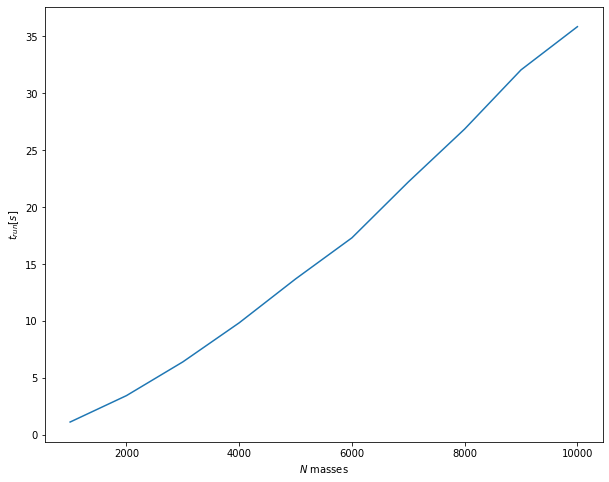

In [46]:
plt.figure(figsize=(10, 8))

plt.plot(Narray, times)
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.show()

Check with a fit if it has the same behaviour as expected: 

In [42]:
def fit_func(N, c, alpha): 
    
    return c*N**alpha*np.log(N)

In [43]:
import scipy
from scipy import optimize

params, _ = scipy.optimize.curve_fit(fit_func, Narray, times)

alpha = 1.3098537261761727


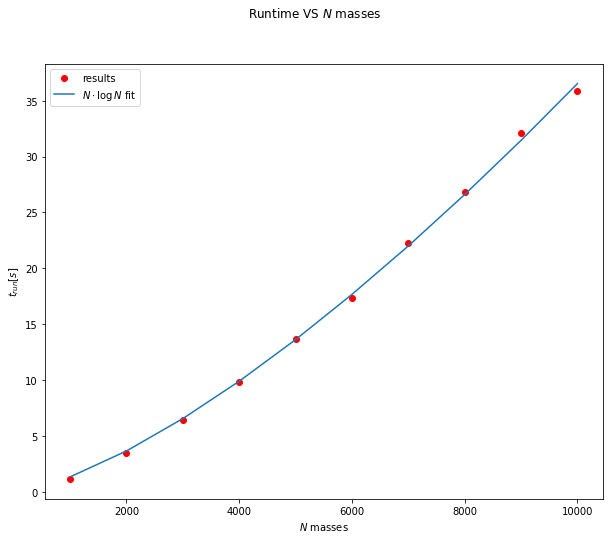

In [49]:
plt.figure(figsize = (10,8))

print("alpha =", params[1])

plt.scatter(Narray, times, c = 'r', label="results")
plt.plot(Narray, fit_func(Narray, params[0], params[1]), label=r"$N \cdot \log{N}$ fit")
plt.xlabel("$N$ masses")
plt.ylabel("$t_{run} [s]$")
plt.suptitle("Runtime VS $N$ masses")
plt.legend()
plt.show();